#                                         Name: Shashank R
#                                         Registration number: 19MIA1105

## Loading Essential libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel("D://Exact space technologies//data.xlsx")

D:\Anaconda\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [3]:
data.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [4]:
data.shape

(377719, 7)

In [5]:
data.dtypes

time                        datetime64[ns]
Cyclone_Inlet_Gas_Temp              object
Cyclone_Material_Temp               object
Cyclone_Outlet_Gas_draft            object
Cyclone_cone_draft                  object
Cyclone_Gas_Outlet_Temp             object
Cyclone_Inlet_Draft                 object
dtype: object

### Converting the columns starting from two to six to float data type


In [4]:
data['Cyclone_Inlet_Gas_Temp']=pd.to_numeric(data['Cyclone_Material_Temp'],errors='coerce')
data['Cyclone_Material_Temp']=pd.to_numeric(data['Cyclone_Material_Temp'],errors='coerce')
data['Cyclone_Outlet_Gas_draft']=pd.to_numeric(data['Cyclone_Outlet_Gas_draft'],errors='coerce')
data['Cyclone_cone_draft']=pd.to_numeric(data['Cyclone_cone_draft'],errors='coerce')
data['Cyclone_Gas_Outlet_Temp']=pd.to_numeric(data['Cyclone_Gas_Outlet_Temp'],errors='coerce')
data['Cyclone_Inlet_Draft']=pd.to_numeric(data['Cyclone_Inlet_Draft'],errors='coerce')

In [5]:
data.dtypes

time                        datetime64[ns]
Cyclone_Inlet_Gas_Temp             float64
Cyclone_Material_Temp              float64
Cyclone_Outlet_Gas_draft           float64
Cyclone_cone_draft                 float64
Cyclone_Gas_Outlet_Temp            float64
Cyclone_Inlet_Draft                float64
dtype: object

## Data Exploration 

### I will be exploring the above dataset through summary statistics

### 1:Maximum
### Finding out maximum amount temperature of hot gas that is entering into the cyclone and leaving out the cyclone.
### Finding out the maximum pressure that is present at outlet of cyclone, at cone section of cyclone and at inlet of the cyclone.
### Finding out maximum temperature of the material at the outlet of the cyclone. 

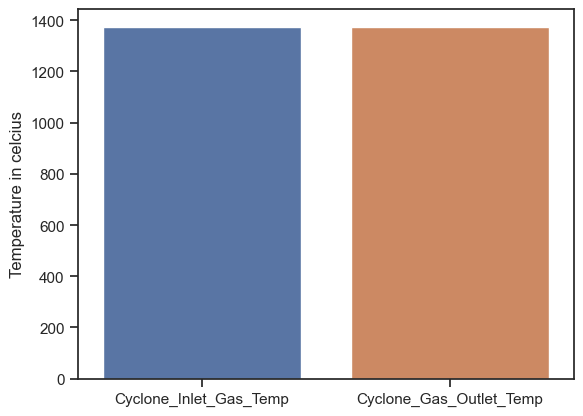

In [25]:
r_data=data[['Cyclone_Inlet_Gas_Temp','Cyclone_Gas_Outlet_Temp']]
max_values=r_data.max()
sns.barplot(x=r_data.columns, y=max_values)
plt.ylabel('Temperature in celcius')
plt.show()

### Therefore the maximum temperature of hot gas that is entering into the cyclone and leaving out the cyclone is around 1300 degree celcius.

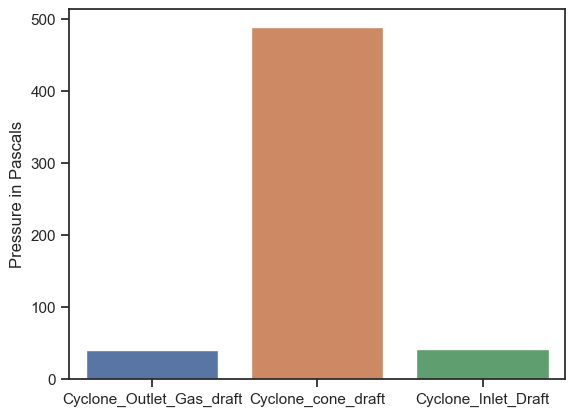

In [26]:
r_data=data[['Cyclone_Outlet_Gas_draft','Cyclone_cone_draft','Cyclone_Inlet_Draft']]
max_values=r_data.max()
sns.barplot(x=r_data.columns, y=max_values)
plt.ylabel("Pressure in Pascals")
plt.show()

### Maximum pressure that is present at outlet of cyclone, at cone section of cyclone and at inlet of the cyclone is 60, 500 and 60 pascals respectively¶

Text(0, 0.5, 'Temperature in celcius')

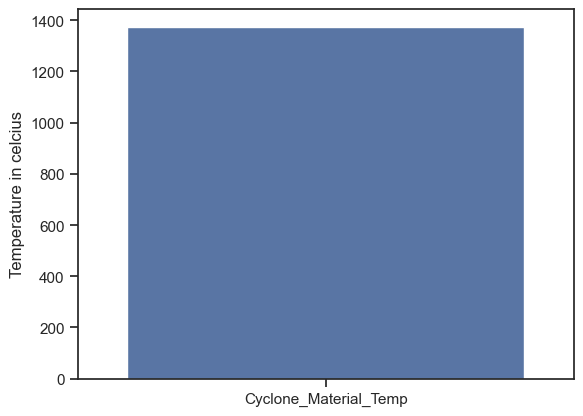

In [27]:
r_data=data[['Cyclone_Material_Temp']]
max_values=r_data.max()
sns.barplot(x=r_data.columns, y=max_values)
plt.ylabel("Temperature in celcius")

### Maximum temperature of the material at the outlet of the cyclone is around 1300 degree celcius. 

### 2: Minimum
### Finding out minimum amount temperature of hot gas that is entering into the cyclone and leaving out the cyclone.
### Finding out the minimum pressure that is present at outlet of cyclone, at cone section of cyclone and at inlet of the cyclone.
### Finding out minimum temperature of the material at the outlet of the cyclone.

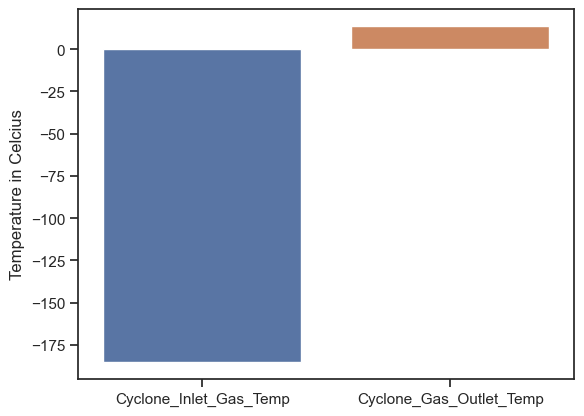

In [28]:
r_data=data[['Cyclone_Inlet_Gas_Temp','Cyclone_Gas_Outlet_Temp']]
min_values=r_data.min()
sns.barplot(x=r_data.columns, y=min_values)
plt.ylabel("Temperature in Celcius")
plt.show()

### Minimum amount temperature of hot gas that is entering into the cyclone and leaving out the cyclone is -175 degree celcius and -15 degree celcius respectively¶

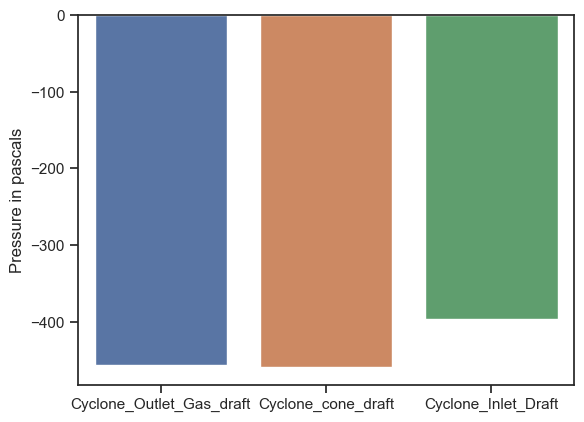

In [29]:
r_data=data[['Cyclone_Outlet_Gas_draft','Cyclone_cone_draft','Cyclone_Inlet_Draft']]
min_values=r_data.min()
sns.barplot(x=r_data.columns, y=min_values)
plt.ylabel("Pressure in pascals")
plt.show()

### Minimum pressure that is present at outlet of cyclone, at cone section of cyclone and at inlet of the cyclone is around -450 degree celcius , -470 degree celcius and -380 degree celcius respectively¶

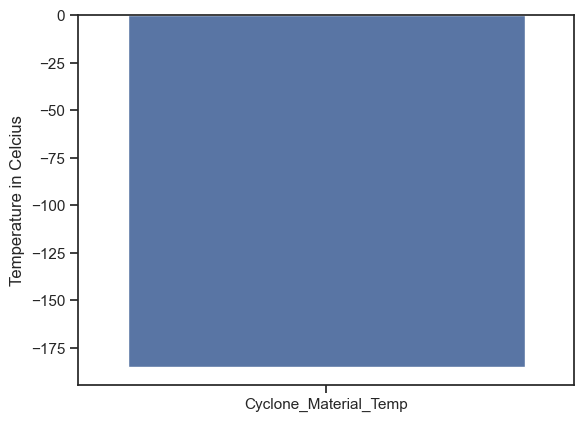

In [30]:
r_data=data[['Cyclone_Material_Temp']]
min_values=r_data.min()
sns.barplot(x=r_data.columns, y=min_values)
plt.ylabel("Temperature in Celcius")
plt.show()

### Minimum temperature of the material at the outlet of the cyclone is -175 degree celcius.

### 3: Average
### Finding out average amount temperature of hot gas that is entering into the cyclone and leaving out the cyclone.
### Finding out the average pressure that is present at outlet of cyclone, at cone section of cyclone and at inlet of the cyclone.
### Finding out average temperature of the material at the outlet of the cyclone.

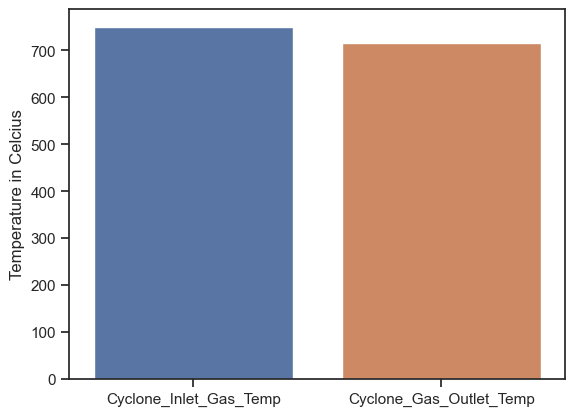

In [31]:
r_data=data[['Cyclone_Inlet_Gas_Temp','Cyclone_Gas_Outlet_Temp']]
mean_values=r_data.mean()
sns.barplot(x=r_data.columns, y=mean_values)
plt.ylabel("Temperature in Celcius")
plt.show()

### Average amount temperature of hot gas that is entering into the cyclone and leaving out the cyclone is around 700 degree celcius and 680 degree celcius.¶

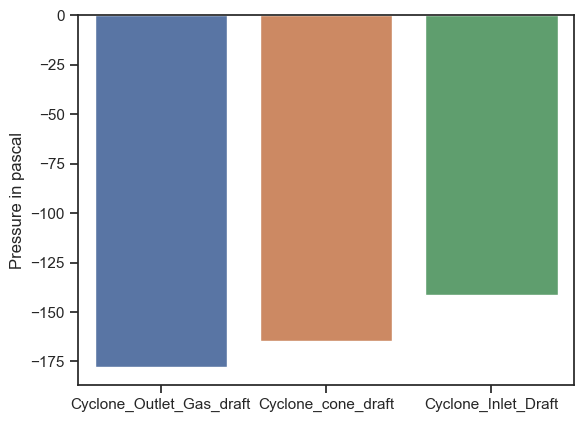

In [32]:
r_data=data[['Cyclone_Outlet_Gas_draft','Cyclone_cone_draft','Cyclone_Inlet_Draft']]
mean_values=r_data.mean()
sns.barplot(x=r_data.columns, y=mean_values)
plt.ylabel("Pressure in pascal")
plt.show()

### Average pressure that is present at outlet of cyclone, at cone section of cyclone and at inlet of the cyclone is around -175 degree celcius, -160 degree celcius and -130 degree celcius respectively

[]

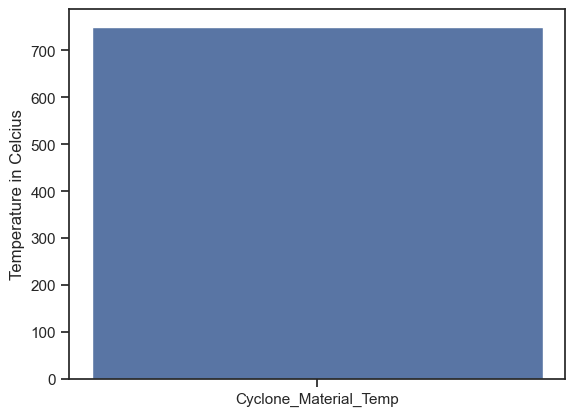

In [33]:
r_data=data[['Cyclone_Material_Temp']]
mean_values=r_data.mean()
sns.barplot(x=r_data.columns, y=mean_values)
plt.ylabel("Temperature in Celcius")
plt.plot()

### Average temperature of the material at the outlet of the cyclone is around 720 degree celcius.

## I will be exploring the utilization of cyclone

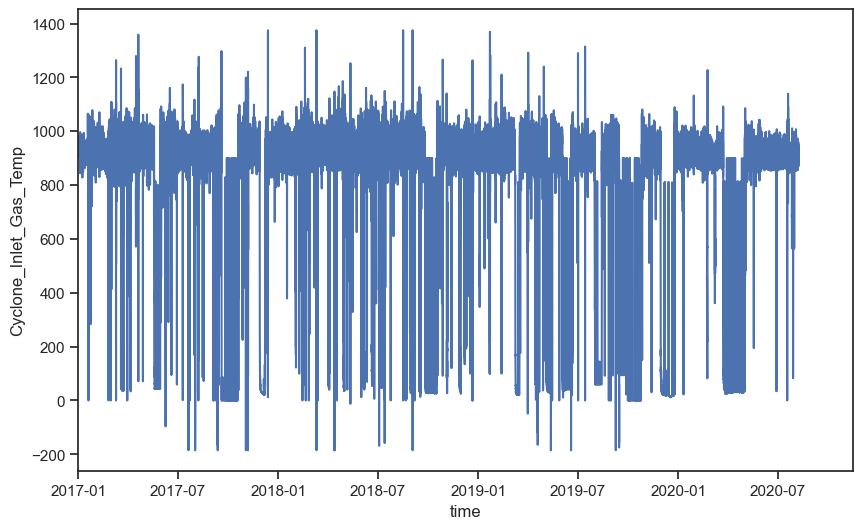

In [19]:
sns.set(style="ticks",color_codes=True) 
plt.figure(figsize=(10, 6))
sns.lineplot(x=data['time'],y=data['Cyclone_Inlet_Gas_Temp'])
plt.xlim(data['time'].min(), data['time'].max() + pd.DateOffset(days=100))
plt.show()

### There is a complete utilization of cyclone during 2017-07 to 2018-01 at the time of hot gas entering into the cyclone

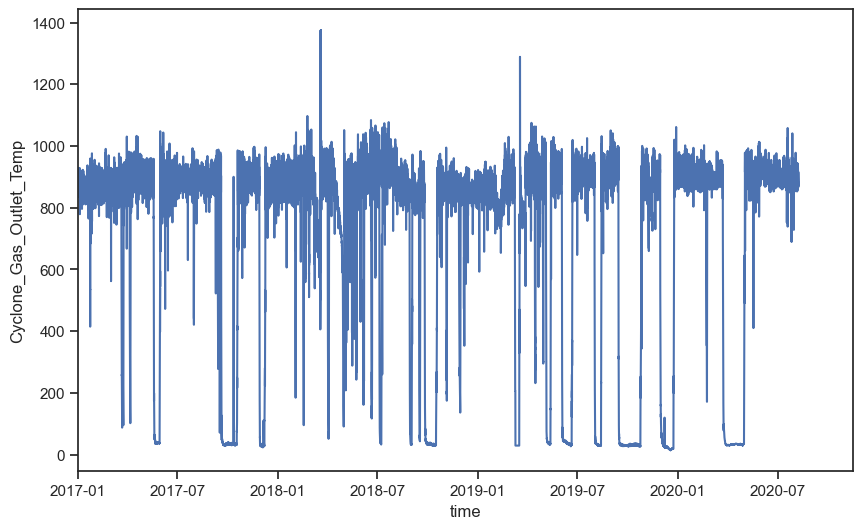

In [22]:
sns.set(style="ticks",color_codes=True) 
plt.figure(figsize=(10, 6))
sns.lineplot(x=data['time'],y=data['Cyclone_Gas_Outlet_Temp'])
plt.xlim(data['time'].min(), data['time'].max() + pd.DateOffset(days=100))
plt.show()

### There is a complete utilisation of cyclone during 2018-01 to 2019-01 at the time of hot gas leaving the cyclone

## Data Preprocessing

### I will be checking the data if it has missing values

In [17]:
data.isna().sum()

time                           0
Cyclone_Inlet_Gas_Temp      1591
Cyclone_Material_Temp       1591
Cyclone_Outlet_Gas_draft    1321
Cyclone_cone_draft          1320
Cyclone_Gas_Outlet_Temp     1321
Cyclone_Inlet_Draft         1322
dtype: int64

### Since we have some missing values I will be filling those values using fillna method. 

In [18]:
df=data.fillna(method ='bfill')

In [19]:
df.isna().sum()

time                        0
Cyclone_Inlet_Gas_Temp      0
Cyclone_Material_Temp       0
Cyclone_Outlet_Gas_draft    0
Cyclone_cone_draft          0
Cyclone_Gas_Outlet_Temp     0
Cyclone_Inlet_Draft         0
dtype: int64

## Comming to actutal problem


### The main objective is to highlight the time periods where abnormality can be observed. For that I need to use some anamoly/outlier based detection methods.I will be using Local outlier factor which is a density based outlier detection  

In [51]:
required=['Cyclone_Inlet_Gas_Temp','Cyclone_Material_Temp','Cyclone_Outlet_Gas_draft','Cyclone_cone_draft','Cyclone_Gas_Outlet_Temp',
            'Cyclone_Inlet_Draft']

# Extract the "Date" column
date_column = df['time']

# Selecting the data for outlier detection
data_for_outliers = df[required]

# Calculate the LOF scores for each sample in the dataset
lof = LocalOutlierFactor(n_neighbors=20) 
outlier_scores = lof.fit_predict(data_for_outliers)

# Identify the outliers based on their LOF scores
outliers = df[outlier_scores == -1]

D:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



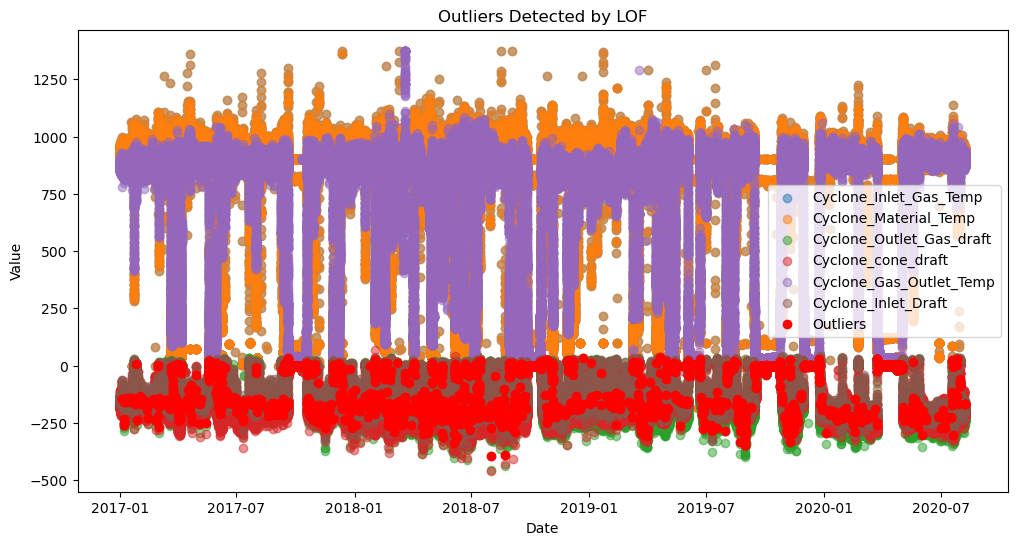

In [54]:
# Plot the outliers corresponding to each date
plt.figure(figsize=(12, 6))
for column in required:
    plt.scatter(date_column, data[column], label=column, alpha=0.5)
plt.scatter(outliers['time'], outliers[column], color='r', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.title('Outliers Detected by LOF')
plt.show()

## Conclusion

### 1.The above plot is obtained by using scatter plot. As you can see that the points highligted in red are all outliers. The other points are considered as normal points.
### 2. We can clearly obeserve that there are abnormalities that are ouccrring quite frequently.So we cannot find out a particular date an abnormality is happening during operation.
### 3. We can observe collective outliers at negative values rather than positive values which might contribute to the abnormality frequently during operation. 
### 4. Intensive handling should be done to prevent abnormality to certain extent.

### note: I used plotify earlier for iteractive plots. But the problem is the plot wont be embedded into the notebook and should be ran each time when the jupyter notebook is opened. So I used seaborn and matplotlib